In [2]:
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt


In [3]:
(trainI,trainL),(testI,testL)=datasets.cifar10.load_data()
trainI,testI=trainI/255,testI/255
trainI[0].shape

(32, 32, 3)

In [4]:
names=['aeroplane','automible','bird','cat','deer','dog','frog','horse','ship','truck']


In [8]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64,(3,3),activation='tanh'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)         

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 6, 6, 64)         

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history=model.fit(trainI,trainL,epochs=20,validation_data=(testI,testL),batch_size=512)


Epoch 1/20
98/98 [==============================] - 4s 28ms/step - loss: 0.7750 - accuracy: 0.7299 - val_loss: 0.8013 - val_accuracy: 0.7215
Epoch 2/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7526 - accuracy: 0.7383 - val_loss: 0.7691 - val_accuracy: 0.7356
Epoch 3/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7422 - accuracy: 0.7396 - val_loss: 0.7992 - val_accuracy: 0.7255
Epoch 4/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7427 - accuracy: 0.7417 - val_loss: 0.7947 - val_accuracy: 0.7235
Epoch 5/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7307 - accuracy: 0.7432 - val_loss: 0.7966 - val_accuracy: 0.7258
Epoch 6/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7260 - accuracy: 0.7443 - val_loss: 0.7682 - val_accuracy: 0.7372
Epoch 7/20
98/98 [==============================] - 2s 24ms/step - loss: 0.7230 - accuracy: 0.7479 - val_loss: 0.7487 - val_accuracy: 0.7412
Epoch 8/20
98

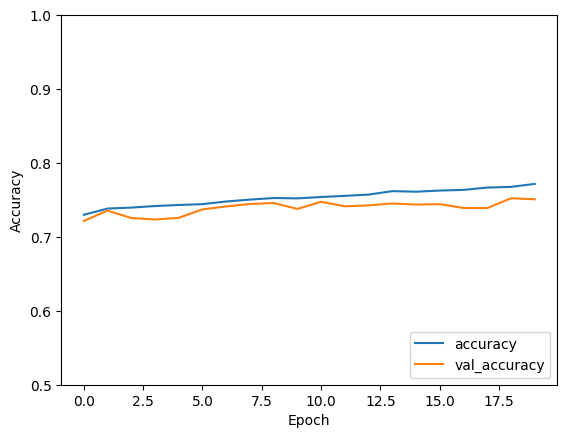

In [13]:
model.save('my_model.keras')
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(testI,  testL, verbose=5)

In [ ]:
print(test_acc)